# Student Performance Indicator

---

## Problem Statement

---

> Test performance of students may depend on multiple factors and not merely on how the student prepared for it.\
> Goal of this project is to understand how various factors including student's **gender**, **ethnicity**, **parental level of education** etc impacts his/her test performance.

## Data Collection

---

### Dataset Source
[Students Performance in Exams, Kaggle](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)

### About the Dataset
1. Includes marks secured by high school students in the United States of America (USA)

|Feature/Column|Explanation|
|:---:|:---:|
|`gender`|Biological sex of student (Male/Female)|
|`race_ethnicity`|Ethnicity of student (anonymized) $\rightarrow$ Group A/B/C/D/E|
|`parental_level_of_education`|Highest qualification of parents $\rightarrow$ Bachelor's degree/Some college/Master's degree/Associate's degree/High school|
|`lunch`|Type of lunch eaten by student before taking the test $\rightarrow$ Standard or Free/reduced|
|`test_preparation_course`|Whether student completed the test preparation materials before taking the test|
|`math_score`||
|`reading_score`||
|`writing_score`||

### Importing Data and Required Libraries

In [157]:
# DEPENDENCIES 

# for numerical computations
import numpy as np
# for working with dataframes and `csv` files
import pandas as pd
# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# for working with file paths
from pathlib import Path

In [2]:
# DATA

file_path = Path("data/stud.csv")

# load csv into dataframe
dataset = pd.read_csv(file_path)

### Getting to Know the Dataset

In [3]:
# make copy of dataframe to avoid accidental changes
df = dataset.copy()

In [4]:
# check top five rows
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# check shape of dataset
n_samples, n_features = df.shape

print(f"Dataset has {n_samples} samples and {n_features} features.")

Dataset has 1000 samples and 8 features.


## Data Checks before EDA

Following basic checks will be done to ensure hassle-free EDA ahead:
1. Missing data
2. Duplicate data
3. Data type of columns
4. No. of unique values per numeric column
5. No. of unique categories per categorical column
6. Basic statistics

---

### Check for Missing data

In [6]:
# total missing data per column
df.isnull().sum(axis=0)

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Check for Duplicates

In [7]:
# total duplicate entries
df.duplicated().sum()

0

### Data types of the Columns

In [8]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

### Unique Values/Categories per Column

In [9]:
# No. of unique values in each feature
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
# unique categories
categorical_cols = [
    column
    for column in df.columns
    if df[column].dtype == "O"
]

for col in categorical_cols:
    print(f"\nCategorical Column -> {col}")
    print(f"{len(df[col].unique())} Unique categories:\n{df[col].unique()}")


Categorical Column -> gender
2 Unique categories:
['female' 'male']

Categorical Column -> race_ethnicity
5 Unique categories:
['group B' 'group C' 'group A' 'group D' 'group E']

Categorical Column -> parental_level_of_education
6 Unique categories:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categorical Column -> lunch
2 Unique categories:
['standard' 'free/reduced']

Categorical Column -> test_preparation_course
2 Unique categories:
['none' 'completed']


### Basic Statistics

In [11]:
# descriptive statistics of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


### Observations
1. There are **no missing values** in the dataset
2. There are **no duplicate entries** in the dataset
3. Following are the data types:
    - **Numeric columns**: `math_score`, `reading_score`, `writing_score`
    - **Categorical columns**: `gender`, `race_ethnicity`, `parental_level_of_education`, `lunch`, `test_preparation_course`
4. `parental_level_of_education` has 6 unique categories, but 2 of them indicate similar level of education $\rightarrow$ 'high school' and 'some high school'
5. `test_preparation_course` has an unique value 'none' which may indicate that the student did not have any test preparation materials
6. Preliminary observations on **test scores** shows:
    - **Mean** scores of students in all three tests are close to each other ($66.08, 69.16, 68.05$)
    - **Standard deviation** of marks in all three tests are also similar ($15.16, 14.60, 15.19$)
    - **Minimum** scores show greater variation:
        - only Maths has min. score of zero
        - remaining tests have seen atleast a score of $10$
    - **Maximum** scores in all three tests is $100$
    
---

## Exploratory Data Analysis (EDA)

---

In [12]:
# separate out column names for easier analysis

categorical_cols = [
    col for col in df.columns
    if df[col].dtype == "O"
]

numeric_cols = [
    col for col in df.columns
    if df[col].dtype != "O"
]

print(f"Categorical columns -> {categorical_cols}\n\nNumeric columns -> {numeric_cols}")

Categorical columns -> ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

Numeric columns -> ['math_score', 'reading_score', 'writing_score']


### Adding New columns for better analysis

In [13]:
# new 'total_score' and 'avg_score' columns

df["total_score"] = (df["math_score"] + df["writing_score"] + df["reading_score"]) ## Total score in 3 tests
df["avg_score"] = (df["math_score"] + df["writing_score"] + df["reading_score"])/3 ## Average score in 3 tests

# check top five rows
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Guiding list for further Exploration
Following questions will be probed ahead in this section to get a better understanding of the student performance:
1. How many students scored **maximum marks** in each tests?
2. How many students **failed** in each tests?
   - **ASSUMPTION**: Passing score $= 40\%$

In [16]:
# maximum marks check
math_max_count = df[df["math_score"] == 100]["total_score"].count()
reading_max_count = df[df["reading_score"] == 100]["total_score"].count()
writing_max_count = df[df["writing_score"] == 100]["total_score"].count()

print(f"No. of students who score maximum marks in each tests ->\n")
print(f"Maths: {math_max_count}\nReading: {reading_max_count}\nWriting: {writing_max_count}")

No. of students who score maximum marks in each tests ->

Maths: 7
Reading: 17
Writing: 14


In [17]:
# failed students check
math_fail_count = df[df["math_score"] < 40]["total_score"].count()
reading_fail_count = df[df["reading_score"] < 40]["total_score"].count()
writing_fail_count = df[df["writing_score"] < 40]["total_score"].count()

print(f"No. of students who failed in tests ->\n")
print(f"Maths: {math_fail_count}\nReading: {reading_fail_count}\nWriting: {writing_fail_count}")

No. of students who failed in tests ->

Maths: 40
Reading: 26
Writing: 32


In [27]:
# helper function
def percent_calc(count_max, count_fail):
    return round((int(count_max)/1000)*100, 2), round((int(count_fail)/1000)*100, 2)

In [29]:
# max scorers
max_scorers_count = [math_max_count, reading_max_count, writing_max_count]
# failed
failed_count = [math_fail_count, reading_fail_count, writing_fail_count]
# subject names
tests_name = ["Math", "Reading", "Writing"]

print(f"STUDENT PERFORMANCE (EXTREMES)\n")

for test, max_c, fail_c in zip(tests_name, max_scorers_count, failed_count):
    max_pct, fail_pct = percent_calc(max_c, fail_c)
    
    print(test, "->")
    print(f"Scored full marks: {max_pct}% students\nFailed: {fail_pct}% students\n")

STUDENT PERFORMANCE (EXTREMES)

Math ->
Scored full marks: 0.7% students
Failed: 4.0% students

Reading ->
Scored full marks: 1.7% students
Failed: 2.6% students

Writing ->
Scored full marks: 1.4% students
Failed: 3.2% students



### Observations
1. Out of three tests, student performance on **Maths** is on the lower side
   - Less that $1\%$ could score the maximum marks, whereas $4\%$ students failed
2. Student performed best in **Reading** section

---

## EDA with Visualizations

---

### Guiding list for further Exploration
1. Understand the **demography** of the students
   - Gender
   - Ethnicity
2. Understand how **average score** is distributed amongst the students
3. Understand how **score in each test** is distributed amongst the students
4. Understand how the type of **lunch** eaten by student before taking the test affects the outcome score
5. Understand **educational background** of the parents


In [30]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'avg_score'],
      dtype='object')

In [162]:
# GENERAL CUSTOMIZATIONS

# Texts
text_title = dict(family="times new roman", size=20)
text_axis = dict(family="times new roman", size=18)
text_ticks = dict(axis="both", labelsize=15)
text_legend_title = dict(family="times new roman", size=12, weight="bold")
text_legend = dict(family="times new roman", labelsize=10)

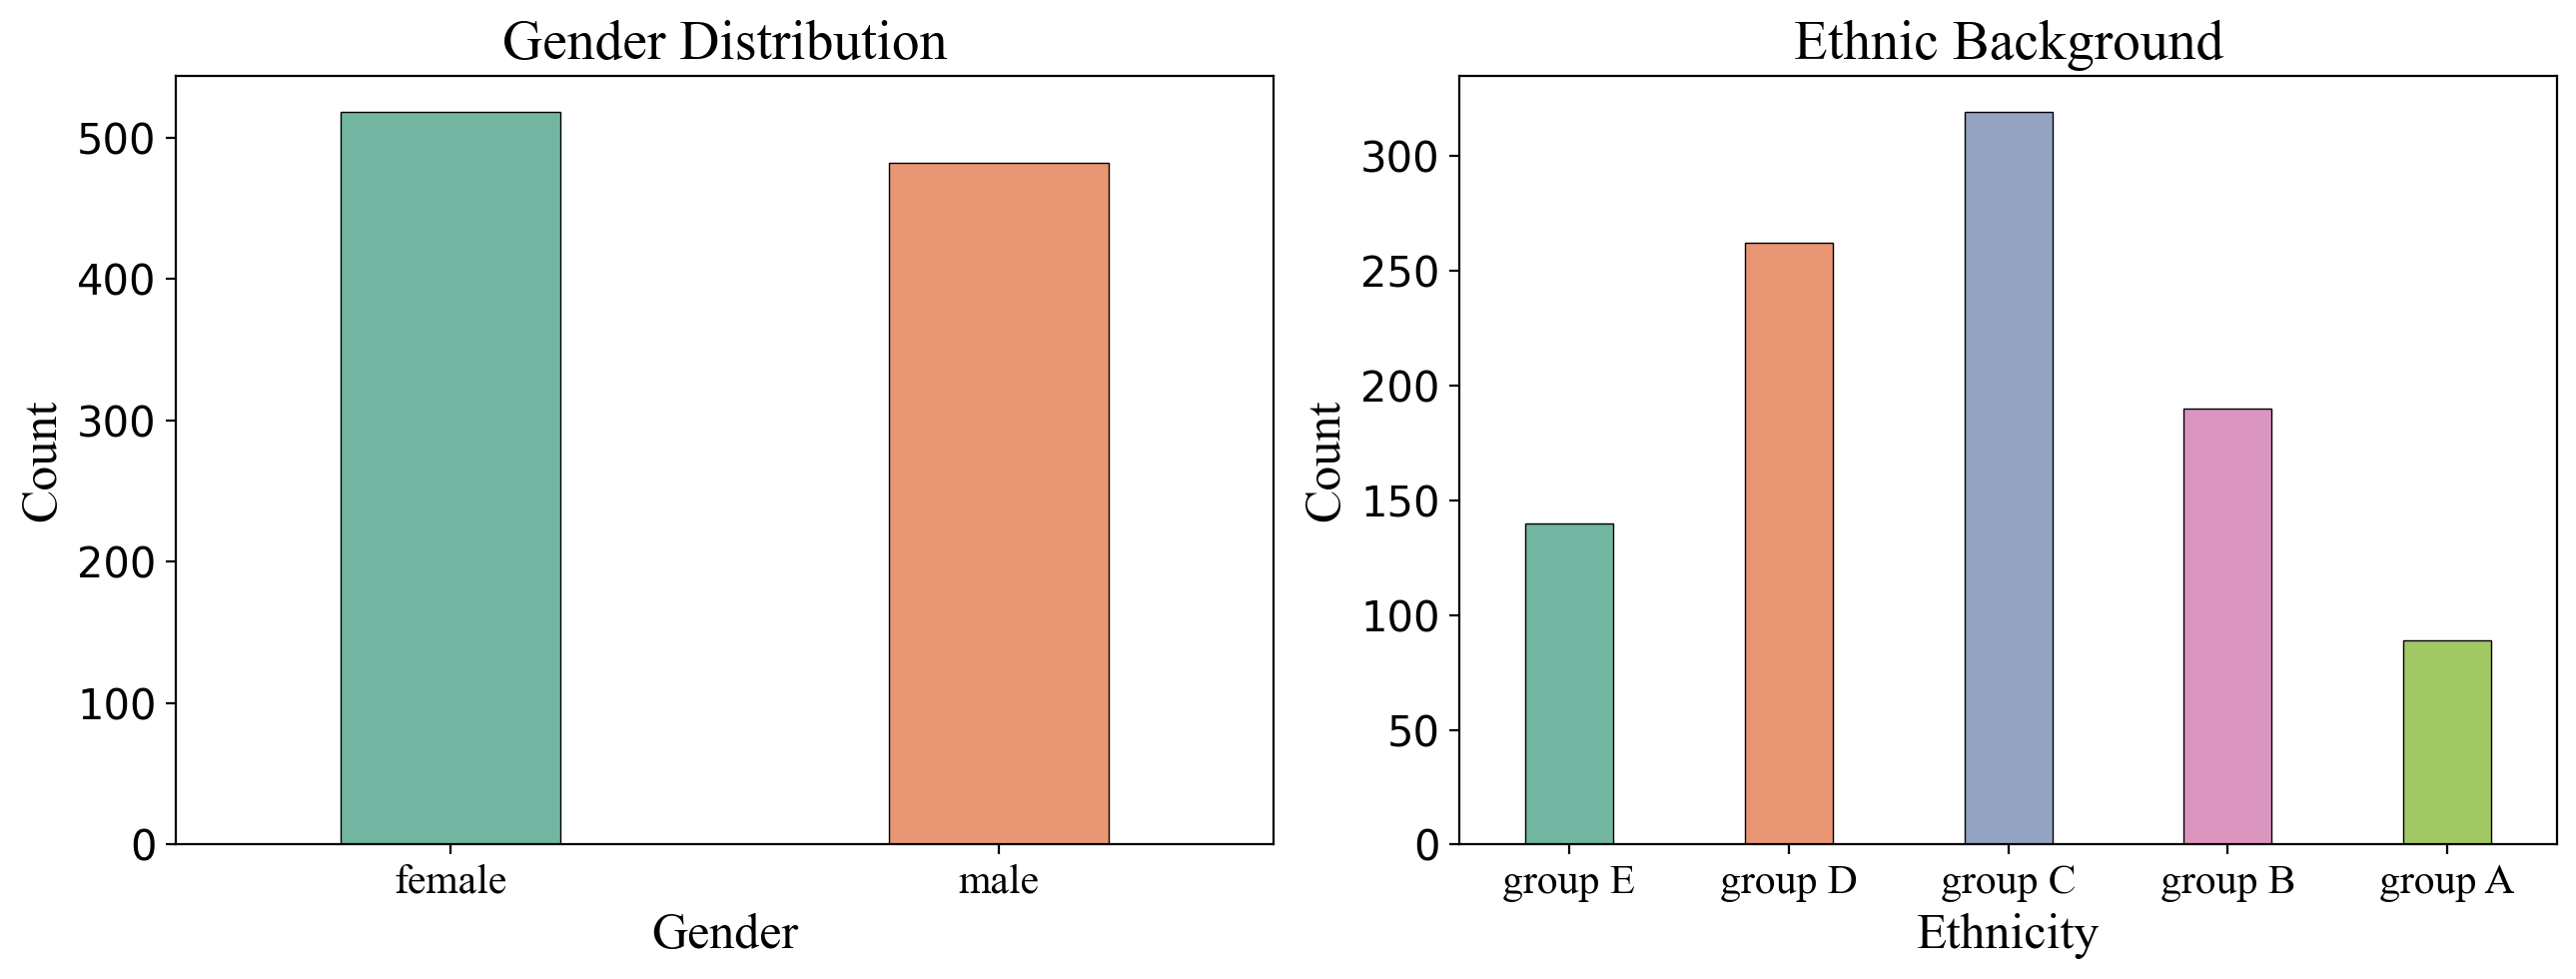

In [122]:
# demography

fig, ax = plt.subplots(nrows=1, ncols=2,
                       figsize=(13,5), dpi=200)

ax_g, ax_e = ax

# gender
sns.countplot(data=df, x="gender", ax=ax_g,
             palette="Set2", width=0.4,
              edgecolor="black", linewidth=0.5)
ax_g.set_xticklabels(ax_g.get_xticklabels(), fontdict=text_axis)
ax_g.set_xlabel("Gender", fontdict=text_axis)
ax_g.set_ylabel("Count", fontdict=text_axis)
ax_g.tick_params(**text_ticks)
ax_g.set_title("Gender Distribution", fontdict=text_title)

# ethnicity
sns.countplot(data=df.sort_values(by="race_ethnicity", ascending=False), x="race_ethnicity", ax=ax_e,
             palette="Set2", width=0.4,
             edgecolor="black", linewidth=0.5)
ax_e.set_xticklabels(ax_e.get_xticklabels(), fontdict=text_axis)
ax_e.set_xlabel("Ethnicity", fontdict=text_axis)
ax_e.set_ylabel("Count", fontdict=text_axis)
ax_e.tick_params(**text_ticks)
ax_e.set_title("Ethnic Background", fontdict=text_title)

fig.tight_layout()

In [123]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'avg_score'],
      dtype='object')

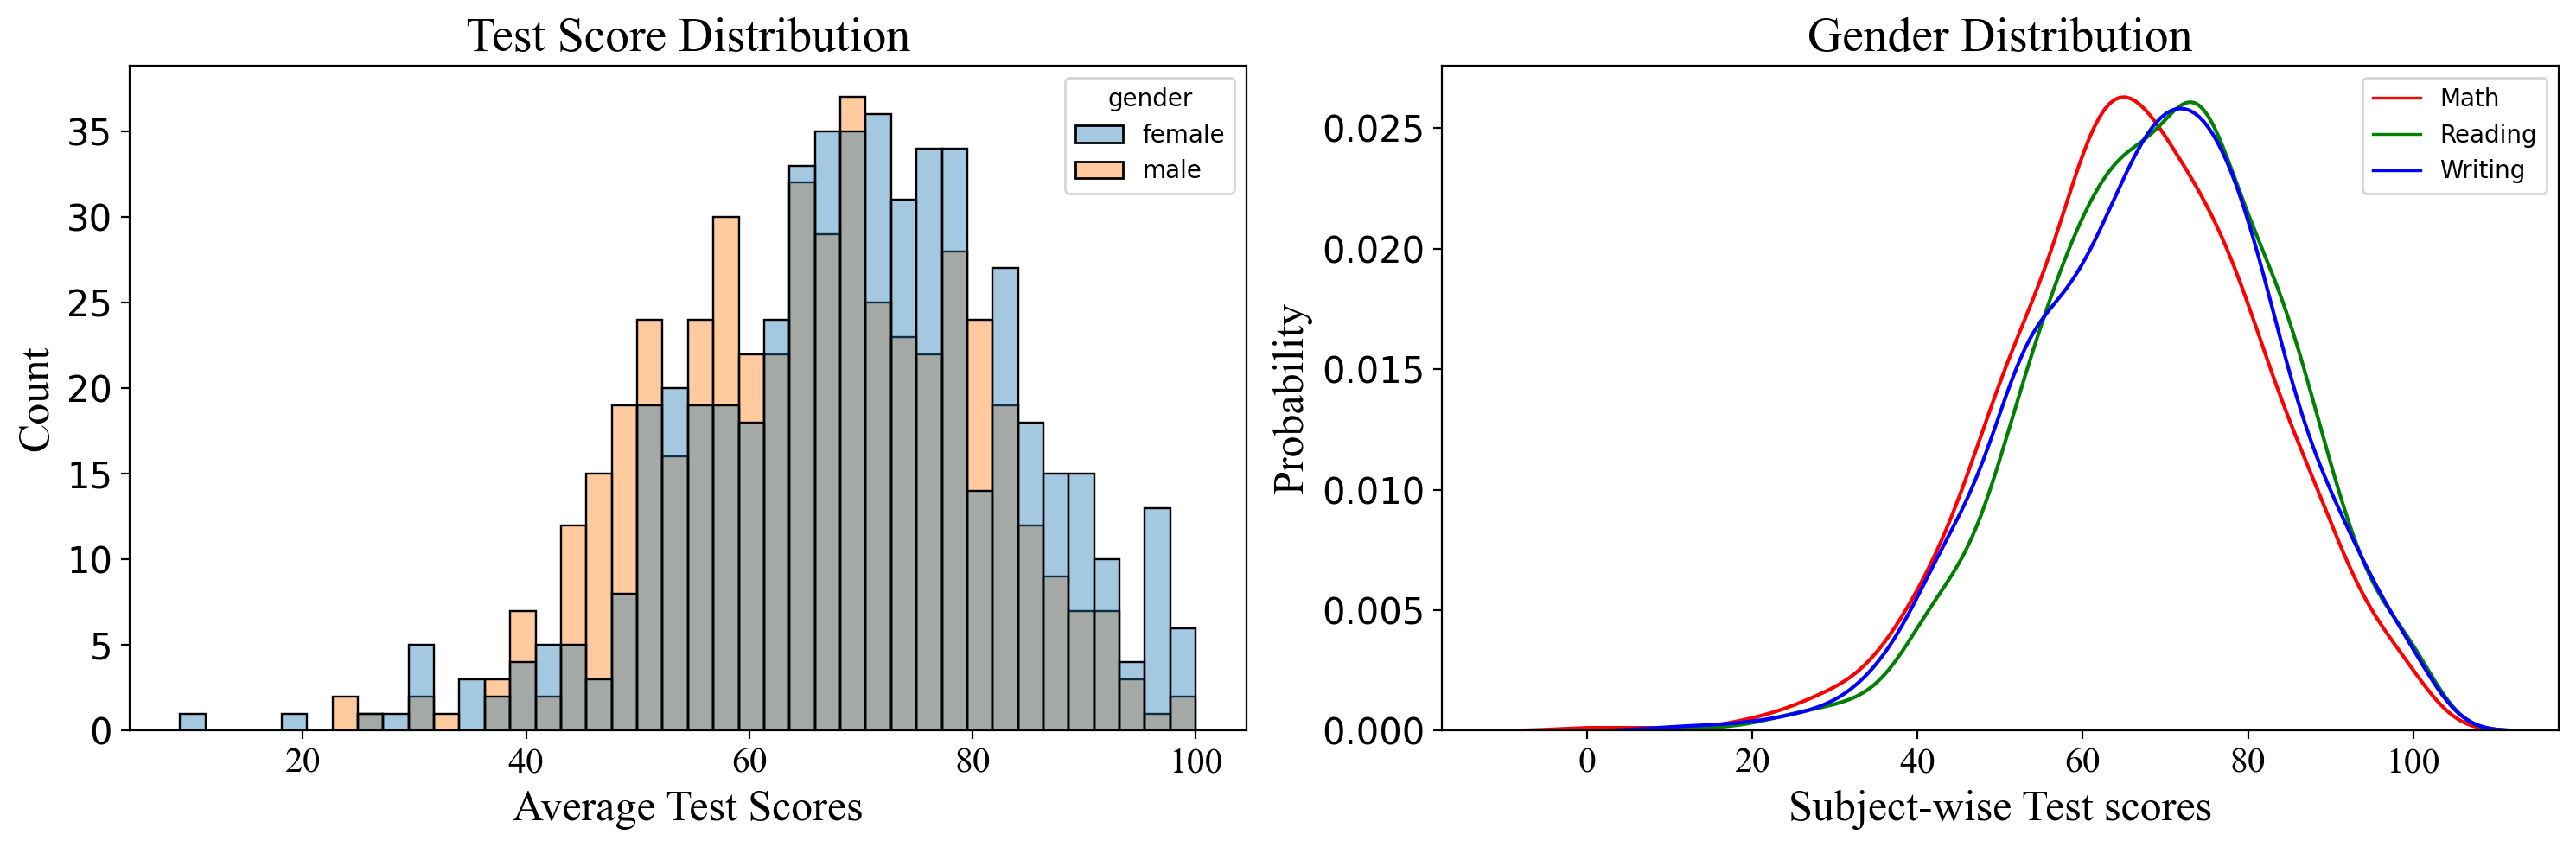

In [161]:
fig, ax = plt.subplots(figsize=(15,5), dpi=200,
                      nrows=1, ncols=2)

ax_hist, ax_kde = ax

# Average score
sns.histplot(data=df, x="avg_score", ax=ax_hist,
            bins=40, hue="gender", kde=False, stat="count",
            color=["red", "blue"], alpha=0.4)

ax_hist.set_xticklabels(ax_hist.get_xticklabels(), fontdict=text_axis)
ax_hist.set_xlabel("Average Test Scores", fontdict=text_axis)
ax_hist.set_ylabel("Count", fontdict=text_axis)
ax_hist.tick_params(**text_ticks)
ax_hist.set_title("Test Score Distribution", fontdict=text_title)



# subject-wise
# custom legend
custom_lines_kde = [Line2D([0], [0], color="red", lw=1.2, label="Math"),
                Line2D([0], [0], color="green", lw=1.2, label="Reading"),
                Line2D([0], [0], color="blue", lw=1.2, label="Writing")]

sns.kdeplot(data=df, x="math_score", ax=ax_kde, color="red")
sns.kdeplot(data=df, x="reading_score", ax=ax_kde, color="green")
sns.kdeplot(data=df, x="writing_score", ax=ax_kde, color="blue")
ax_kde.legend(handles=custom_lines_kde)
ax_kde.set_xticklabels(ax_kde.get_xticklabels(), fontdict=text_axis)
ax_kde.set_xlabel("Subject-wise Test scores", fontdict=text_axis)
ax_kde.set_ylabel("Probability", fontdict=text_axis)
ax_kde.tick_params(**text_ticks)
ax_kde.set_title("Gender Distribution", fontdict=text_title)

fig.tight_layout();